In [60]:
#Running the necessary imports.

import cv2
import numpy as np
import dlib
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

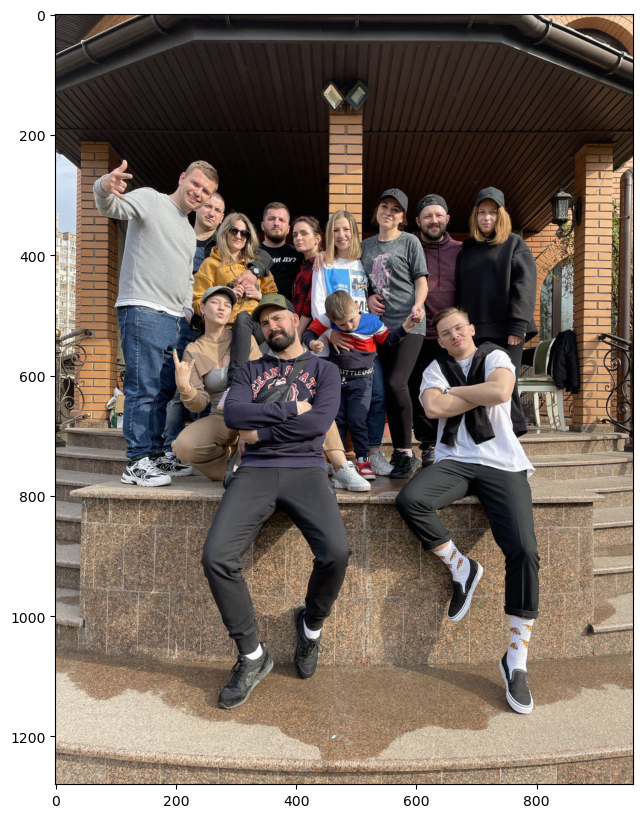

In [61]:
#Loading an image (any image that contains faces).

img = cv2.imread('C:/Users/UNNAMED USER/Desktop/dataset/tusa.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(img)

In [62]:
#Load the dlib face predictor.
detector = dlib.get_frontal_face_detector()

#The 1 in the second argument indicates that we should upsample the image
rects = detector(gray, 1)

In [63]:
print('Number of detected faces:', len(rects))
print(rects)


def rect_to_bb(rect):
    # Dlib rect --> OpenCV rect
    x = rect.left()
    y = rect.top()
    w = rect.right() - x
    h = rect.bottom() - y

    return (x, y, w, h)

Number of detected faces: 12
rectangles[[(386, 348) (429, 391)], [(607, 324) (650, 367)], [(698, 319) (741, 362)], [(237, 310) (280, 353)], [(347, 329) (391, 372)], [(453, 348) (496, 391)], [(636, 510) (688, 562)], [(210, 274) (262, 326)], [(252, 468) (295, 511)], [(530, 310) (573, 353)], [(285, 354) (321, 390)], [(337, 493) (389, 545)]]


(<AxesSubplot: title={'center': 'Dlib'}>,
 Text(0.5, 1.0, 'Dlib'))

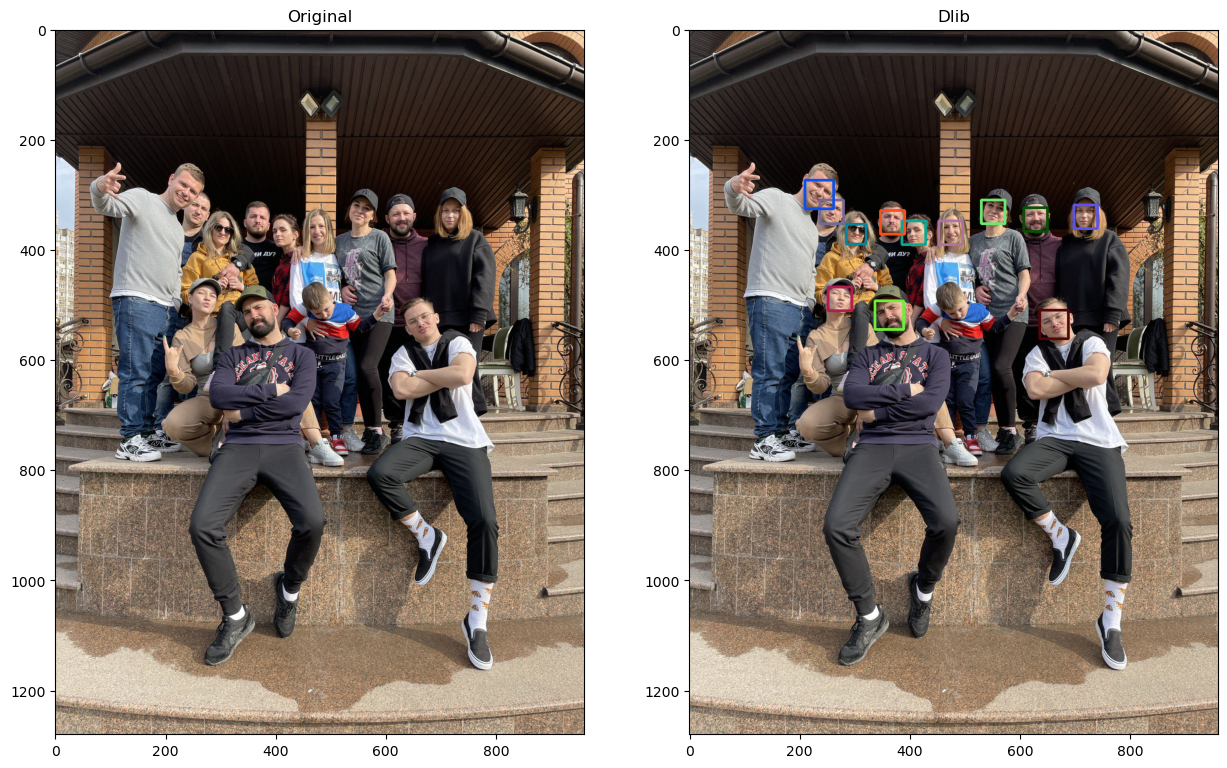

In [64]:
# Draw rectangle around each face
result_dlib = np.copy(img)
faces_dlib_img = []
for rect in rects:    
    # Draw rectangle around the face
    x, y, w, h = rect_to_bb(rect)
    #print(x, y, w, h)
    color = list(np.random.random(size=3) * 256)
    cv2.rectangle(result_dlib, (x, y), (x+w, y+h), color, 3)
    faces_dlib_img.append(img[y:y+h, x:x+w, :])
    

plt.subplot(121), plt.imshow(img), plt.title('Original')
plt.subplot(122), plt.imshow(result_dlib), plt.title('Dlib')

### Step 5 (optional)

### How does the detector work? Is it robust?

I tested the detector on several different types of photo (selfie photo - FD1.jpg , photo with several portraits of faces - eu_summit.jpg / faces_pano_1.jpg, and a photo with a large number of faces in different poses, with hats, glasses for vision and sunglasses - tusa.jpg)
And to my surprise, the detector worked very well in all cases, and found all the faces that look at the camera in one way or another, and only did not detect the face of a child who does not look at the camera, so I think that this face detector works confidently and we can call him robust :)